# Parcial 1. Teoría de procesos estocásticos (2023-I)
## Michel Mendivenson Barragán Zabala
## 31/Marzo/2023
El siguiente documento corresponde a la entrega del 60% de la nota del primer parcial del semestre 2023-I del curso de Teoría de Procesos Estocásticos dirigido por el profesor Viswanathan Arunachalam.

In [1]:
import numpy as np
#Importamos numpy para manipulación de matrices
import random as rd
#Imlportamos random para la simulación de las elecciones en una cadena de Markov.

# Preparación inicial de una función que simula una cadena de Markov partiendo
# de un punto de partida dado.
def generar_cadena(estado_actual, matriz_de_transicion,posibles_estados,no):
    # Esta función hace que la cadena cambie de estado
    # (Todos los estados que sean necesarios) dado que ya 
    # se escogió el estado inicial de la cadena.
    s = 1 #Inicializamos el contador para alcanzar la longitud requerida de la cadena.
    cadena = [] #Se inicia una lista para guardar la cadena.
    cadena.append(estado_actual) #Como la cadena ya está en el paso 1, agregamos ese estado a la cadena.
    x_vec = matriz_de_transicion[posibles_estados.index(estado_actual)]
    # Lo anterior es como escoger el vector de probabilidades asociado al
    # estado en el que actualmente se encuentra la cadena.
    while s < no:
        # Siempre que no se halla alcanzado la longitud de la cadena deseada seguir calculando.
        nuevo_estado = rd.choices(posibles_estados,x_vec)[0]
        # La función random.choices() permite seleccionar un elemento o varios 
        # de una lista dada teniendo en cuenta un vector de probabilidades dado.
        x_vec = matriz_de_transicion[posibles_estados.index(nuevo_estado)]
        # Saltar al vector de probabilidades relacionado al estado seleccionado.
        cadena.append(nuevo_estado) #Agregar el estado seleccionado a la cadena.
        s = s+1 
    return cadena

--- 

#### **Punto 1**

Considera una cadena de Markov con espacio de estados $S = \{0,1,2,3,4,5\}$ y la matriz de probabilidades de transición:  

$$P = \begin{pmatrix}0&0&1&0&0&0\\\:0&0&0&0&0&1\\ \:0&0&0&0&1&0\\ \:\frac{1}{3}&\frac{1}{3}&\frac{1}{3}&0&0&0\\ \:1&0&0&0&0&0\\ \:0&\frac{1}{2}&0&0&0&\frac{1}{2}\end{pmatrix}$$  
  
  
   + Clasifica los estados a las clases.  
   
   + Estudia la recurrencia o transitoriedad de cada uno de los estados de la cadena.
   
   + Calcula el período de cada una de las clases recurrentes.
   
   + Identifica los estados ergódicos.


---
---

##### **Análisis:**
Como en este punto se pide clasificar los estados en clases, se crea una función ```clas_estados``` específicamente para cumplir esta tarea con cualquier matriz de probabilidades y con cualquier conjunto de estados dados.

In [708]:
# Creación de la función clas_estados
def clase_estados(estados,matriz_transicion):
    # Un diccionario que guardará como llaves 
    # los estados y como dato un conjunto de los estados
    # con los que el estado de la llave se comunica.
    clase_de_clases = {}
    a = 0
    #El siguiente método lo que hace es crear una lista de
    #los estados alcanzables a partir de cierto estado en un solo paso.
    while a < len(matriz_transicion):
        clase_actual = []
        cursor = 0 
        while cursor < len(matriz_transicion[a]):
            if matriz_transicion[a][cursor] != 0:
                clase_actual.append(estados[cursor])
            cursor += 1
        #clase_actual.append(estados[a])
        clase_de_clases[estados[a]] = clase_actual
        a +=1
    # En la próxima iteración, extendemos los estados alcanzables.
    for i in clase_de_clases:
        a = clase_de_clases[i] + [i]
        for e in clase_de_clases[i]:
            a = a + clase_de_clases[e]
            clase_de_clases[i] = a
    # Algunos estados quedan repetidos, el método set convierte
    # cada lista en un conjunto para eliminar los elementos repetidos.
    for i in clase_de_clases:
        clase_de_clases[i] = set(clase_de_clases[i])
    clases_alcanzables = clase_de_clases.copy()
    # Con este método, si algún estado está comunicado con cualquier otro estado
    # en cualquier número de pasos se consigna en una lista.
    for i in clase_de_clases:
        clase = []
        for e in clase_de_clases[i]:
            if i in clase_de_clases[e]:
                clase = clase + [e]
        clase_de_clases[i] = set(tuple(clase))
    #La función retorna dos elementos, el primero sintetiza
    #con un diccionario todos los estados alcanzables a partir
    #de cualquier estado y el segundo no da las clases 
    # sintetizadas por estados.
    return (clases_alcanzables,clase_de_clases)

In [716]:
P = [[0,0,1,0,0,0],
     [0,0,0,0,0,1],
     [0,0,0,0,1,0],
     [1/3,1/3,1/3,0,0,0],
     [1,0,0,0,0,0],
     [0,1/2,0,0,0,1/2]]
estados = [0,1,2,3,4,5]
Sol_1 = clase_estados(estados, P)
print(f'Las siguientes son las respectivas clases de cada uno de los estados:')
for i in Sol_1[1]:
    print(f'Para el estado {i} su clase es {Sol_1[1][i]}')

Las siguientes son las respectivas clases de cada uno de los estados:
Para el estado 0 su clase es {0, 2, 4}
Para el estado 1 su clase es {1, 5}
Para el estado 2 su clase es {0, 2, 4}
Para el estado 3 su clase es {3}
Para el estado 4 su clase es {0, 2, 4}
Para el estado 5 su clase es {1, 5}


Es decir, la cadena está compuesta de tres clases que son: $C_{0} = \{0,2,4\}$, $C_{1}=\{1,5\}$ y $C_{3} = \{3\}$. Además, por otro lado:

In [719]:
print(f'Las siguientes son las estados alcanzables a partir de cada uno de los estados:')
for i in Sol_1[0]:
    print(f'Para el estado {i} su clase es {Sol_1[0][i]}')

Las siguientes son las estados alcanzables a partir de cada uno de los estados:
Para el estado 0 su clase es {0, 2, 4}
Para el estado 1 su clase es {1, 5}
Para el estado 2 su clase es {0, 2, 4}
Para el estado 3 su clase es {0, 1, 2, 3, 4, 5}
Para el estado 4 su clase es {0, 2, 4}
Para el estado 5 su clase es {1, 5}


Como la clase comunicante de los estados 0,1,2,4,5 coincide con los estados alcanzables a partir de cada uno de estos estados, podemos decir que las clases $C_{0}$ y $C_{1}$ son cerradas (Y por ende recurrentes positivas) mientras que el estado 3 es transitorio.

Finalmente, la clase $C_{0}$ no es ergódica porque partiendo de cualquier estado pertenenciente a ésta siempre habrán tres pasos para volver a llegar al mismo estado, es decir, la clase tiene período 3. Mientras que la clase $C_{1}$ si es ergódica pues su período es 1 ya que es posible volver de 5 a 5 en un sólo paso.

--- 

#### **Punto 2**

Considera una caminata aleatoria con los estados $S=\{-2,-1,0,1,2\}$. Si el proceso está en estado $i(i = -1,0,1)$, entonces se mueve a cualquier $i-1$ o $i+1$ con igual probabilidad. Si el proceso se encuentra en el estado $-2$ o $2$ en el tiempo n, entonces se mueve al estado $-1,0$ o $1$ en el tiempo $n+1$ con probabilidad igual. 


- Escriba la matriz de probabilidad de transición para esta caminata aleatoria.
- Calcule la distribución estacionaria.

---
---

##### **Análisis:**

Por lo que dice el enunciado la matriz de probabilidades de transición de la caminata aleatoria queda definida como:

$$P = \begin{matrix}&-2&-1&0&1&2\\ -2&0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}&0\\ -1&\frac{1}{2}&0&\frac{1}{2}&0&0\\ 0&0&\frac{1}{2}&0&\frac{1}{2}&0\\ 1&0&0&\frac{1}{2}&0&\frac{1}{2}\\ 2&0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}&0\end{matrix}$$

In [286]:
#Valiendonos del método numpy, podemos calcular la distribución estacionaria
#usando el método dado en Adventures In Stochastic Processes pag. 138:

P = np.array([[0,1/3,1/3,1/3,0],
              [1/2,0,1/2,0,0],
              [0,1/2,0,1/2,0],
              [0,0,1/2,0,1/2],
              [0,1/3,1/3,1/3,0]])
x = np.array([1,1,1,1,1])
ONE = np.ones((5,5))
# El método np.ones crea una matriz de unos con las dimensiones específicadas.
# El método np.identity crea la matriz identidad con las dimensiones específicadas.
Dist_Est = x.dot(np.linalg.inv(np.identity(5)-P+ONE))
print(f'El vector de distribución estacionaria resultante es {Dist_Est}')

El vector de distribución estacionaria resultante es [0.11538462 0.23076923 0.30769231 0.23076923 0.11538462]


In [290]:
#También es posible conocer una apróximación de este número con una simulación.
estados = ['-2','-1','0','1','2']
P = np.array([[0,1/3,1/3,1/3,0],
              [1/2,0,1/2,0,0],
              [0,1/2,0,1/2,0],
              [0,0,1/2,0,1/2],
              [0,1/3,1/3,1/3,0]])
a = generar_cadena(rd.choices(estados)[0],P,estados,1000000)
print(f'El vector de distribución estacionaria debería ser apróximadamente:')
print(f'-2 ({a.count("-2")/1000000})')
print(f'-1 ({a.count("-1")/1000000})')
print(f' 0 ({a.count("0")/1000000})')
print(f' 1 ({a.count("1")/1000000})')
print(f' 2 ({a.count("2")/1000000})')

El vector de distribución estacionaria debería ser apróximadamente:
-2 (0.114737)
-1 (0.23072)
 0 (0.308379)
 1 (0.230854)
 2 (0.11531)


--- 
#### **Punto 3**

En la oficina de Admisiones de la Universidad Nacional se ha obtenido la información necesaria para las siguientes estadísticas sobre un programa de Magíster que dura tres niveles: el 70% de los estudiantes que ingresan al primer nivel pasan con éxito al segundo nivel, el 10% lo tiene que repetir y el 20% restante se retira por diferentes motivos; de todos los estudiantes que pasan al segundo nivel, el 80% accede al tercer nivel, el 8% repite y el 12% restante sale del programa por bajo nivel académico o por otras razones; de todos los estudiantes que ingresan al tercer nivel el 90% se ha graduado, el 6% lo tiene que repetir, y el 4% restante no puede optar al titulo y los retiran por no cumplir las normas estipuladas.

- ¿Cuántos alumnos lograrán el título de Magíster de un grupo de 100 aspirantes que se matricularon en primer nivel?
- Si cada nivel dura un semestre, durante cuántos años se deberá ofrecer este Magíster si el país necesita aproximadamente 500 especialistas en esta área, sabiendo que esta universidad sólo está en capacidad de recibir, como máximo, 50 alumnos nuevos cada semestre?

---
---
##### **Análisis:**

- **¿Cuántos alumnos llegarán a graduarse de los 100 que se inscribieron en el primer nivel?** 
Notése que a pesar de que inicialmente se podrían considerar tres estados solamente: *"Primer nivel"*, *"Segundo nivel"* y *"Tercer nivel"*, es más adecuado para el problema tener en cuenta que el estado *"Retirado"* y el estado *"Graduado"* también hacen parte de los estados del proceso. Más que eso, son estados absorbentes. Modelemos este proceso como una cadena de Markov entonces, con estados:
    + R: "Retirado"
    + 1: "Primer nivel"
    + 2: "Segundo nivel"
    + 3: "Tercer nivel"
    + G: "Graduado"
Luego, la probabilidad que se nos pregunta es equivalente a la probabilidad de que se alcance primero el estado G antes que el estado R. 

La matriz de probabilidades de transición del proceso quedaría definida de la siguiente forma:

$$P = \begin{matrix}&&R&1&2&3&G\\ &&&&&&\\ R&&1&0&0&0&0\\ 1&&0.2&0.1&0.7&0&0\\ 2&&0.12&0&0.08&0.8&0\\ 3&&0.04&0&0&0.06&0.9\\ G&&0&0&0&0&1\end{matrix}$$

Si tomamos la matriz de probabilidades de transición entre estados no absorbentes como:

$$Q = \begin{matrix}&&1&2&3\\ &&&&\\ 1&&0.1&0.7&0\\ 2&&0&0.08&0.8\\ 3&&0&0&0.06\end{matrix}$$

Y la matriz de transición partiendo de los estados no absorbentes a los estados absorbentes como:

$$R = \begin{matrix}&&R&G\\ &&&\\ 1&&0.2&0\\ 2&&0.12&0\\ 3&&0.04&0.9\end{matrix}$$

Entonces podremos conocer la probabilidad con la que partiendo de un estado no absorbente caemos en uno que sí lo es mediante el cálculo de $(I-Q)^{-1}R$

In [2]:
Q = np.array([[0.1,0.7,0],
              [0,0.08,0.8],
              [0,0,0.06]])

R = np.array([[0.2,0],
              [0.12,0],
              [0.04,0.9]])

Sol_2 = np.linalg.inv(np.identity(3)-Q).dot(R)
print(f'La matriz resultante de la operación (I-Q)⁻¹R es:\n {Sol_2}')
print(f'\nEs decir, la probabilidad de que un estudiante que haya iniciado en')
print(f'el primer nivel se gradué es de {Sol_2[0][1]} y por ende podemos decir')
print(f'que de cada 100 estudiantes deberían llegar graduarse alrededor de {round(Sol_2[0][1]*100)}')

La matriz resultante de la operación (I-Q)⁻¹R) es:
 [[0.35245143 0.64754857]
 [0.16743756 0.83256244]
 [0.04255319 0.95744681]]

Es decir, la probabilidad de que un estudiante que haya iniciado en
el primer nivel se gradué es de 0.6475485661424606 y por ende podemos decir
que de cada 100 estudiantes deberían llegar graduarse alrededor de 65


In [179]:
#La siguiente es una simulación del problema planteado.
counter = 0
estados = ['R','1','2','3','G']
estado_inicial = '1'
P = [[1,0,0,0,0],
     [0.2,0.1,0.7,0,0],
     [0.12,0,0.08,0.8,0],
     [0.04,0,0,0.06,0.9],
     [0,0,0,0,1]]
for i in range (0,100):
    a = generar_cadena(estado_inicial, P,estados,6)
    if a[-1] == 'G':
        counter +=1
print(f'Notése que de 100 veces que se hizo correr el proceso, resultaron graduados {counter} estudiantes')

#Sin embargo, esta cantidad de estudiantes puede alejarse un poco de los
#previstos 65 pues es sólo una simulación e incluso dada la longitud de
#la cadena generada (6) aún pueden haber alumnos que están en alguno
#de los tres niveles. Para conocer una aproximación podríamos generar 
#la misma simulación muchas veces y promediar los resultados (Teniendo
#también en cuenta que los estudiantes ya no estén dentro del programa)

Notése que de 100 veces que se hizo correr el proceso, resultaron graduados 65 estudiantes


- Si cada nivel dura un semestre, durante cuántos años se deberá ofrecer este Magíster si el país necesita aproximadamente 500 especialistas en esta área, sabiendo que esta universidad sólo está en capacidad de recibir, como máximo, 50 alumnos nuevos cada semestre?

Por otro lado, la matriz $(I-Q)^{-1}$, específicamente su fila 1, nos dice en promedio cuántos semestres pasa el estudiante en cada uno de los niveles luego de entrar al primer nivel hasta que se gradue o se retire. Y la suma de los componentes de dicha fila resulta ser el tiempo medio en que un estudiante dura en el programa si empezó desde el nivel 1.

In [181]:
# Tiempo promedio que dura un estudiante en el programa:
Sol4_2 = np.linalg.inv(np.identity(3)-Q).dot(np.array([[1],[1],[1]]))
print(f'Los estudiantes que entran al programa tiende a tardar apróximadamente {(np.linalg.inv(np.identity(3)-Q).dot(np.array([[1],[1],[1]])))[0][0]} semestres antes de salir del programa. bien sea como estudiantes graduados o retirados.')

Los estudiantes que entran al programa tiende a tardar apróximadamente 2.676020145955391 semestres antes de salir del programa. bien sea como estudiantes graduados o retirados.


Ahora bien, por el punto anterior sabemos que cada estudiante que entre al programa tiene una posibilidad del 0.68 apróximadamente de salir graduado y una probabilidad de 0.32 de no poder culminar el programa de Magíster. Esto quiere decir que de cada cincuenta alumnos que ingresen se graduarán apróximadamente unos 34 alumnos. Teniendo esto en consideración. Por cada ciclo realmente sólo se estarán graduando 34 alumnos con una media de duración de 3 semestres. Es decir, el programa necesita estar activo por apróximadamente $\frac{500}{34} + 2$ semestres (Donde $\frac{500}{34}$ corresponde a los semestres en que entran las personas necesarias y los 2 semestres a los semestres en los que los últimos estudiantes culminan su ciclo), algo así como 17 semestres (8 años y medio). Haciendo los cálculos con las probabilidades exactas, el programa debería estar vigente durante 17.443 semestres para lograr graduar 500 estudiantes.

---

#### **Punto 4**

A rat is put into compartment 4 of the maze. He moves through the compartments at random; i.e. if there are $k$ ways to leave a compartment, he chooses each of these with probability $\frac{1}{k}$. What is the probability the rat finds the food in compartment $3$ before feeling the electric shock in compartment $7$? The maze is represented in the next image:

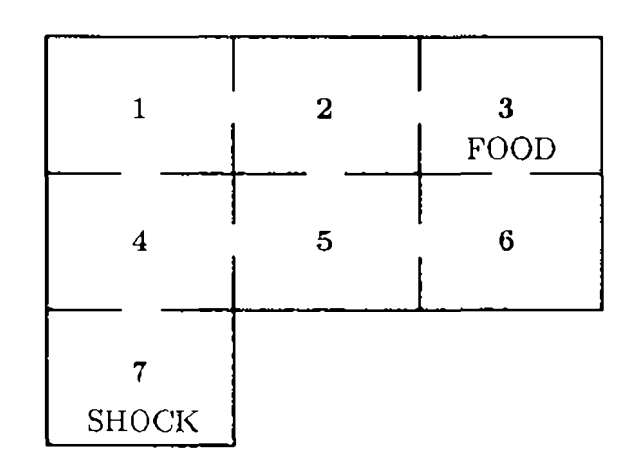

---
---

##### **Análisis:**

Notesé que el acto del ratón eligiendo un camino u otro corresponde a una cadena de Markov con matriz de transición definida como:

$$P = \begin{matrix}&1&2&3&4&5&6&7\\ 1&0&\frac{1}{2}&0&\frac{1}{2}&0&0&0\\ 2&\frac{1}{3}&0&\frac{1}{3}&0&\frac{1}{3}&0&0\\ 3&0&\frac{1}{2}&0&0&0&\frac{1}{2}&0\\ 4&\frac{1}{3}&0&0&0&\frac{1}{3}&0&\frac{1}{3}\\ 5&0&\frac{1}{3}&0&\frac{1}{3}&0&\frac{1}{3}&0\\ 6&0&0&\frac{1}{2}&0&\frac{1}{2}&0&0\\ 7&0&0&0&1&0&0&0\end{matrix}$$

Sin embargo, para responder la pregunta qué se hace podemos ver a 3 y a 7 como estados absorbentes convirtiendose la matriz $P$ en la siguiente matriz:

$$P' = \begin{matrix}&1&2&3&4&5&6&7\\ 1&0&\frac{1}{2}&0&\frac{1}{2}&0&0&0\\ 2&\frac{1}{3}&0&\frac{1}{3}&0&\frac{1}{3}&0&0\\ 3&0&0&1&0&0&0&0\\ 4&\frac{1}{3}&0&0&0&\frac{1}{3}&0&\frac{1}{3}\\ 5&0&\frac{1}{3}&0&\frac{1}{3}&0&\frac{1}{3}&0\\ 6&0&0&\frac{1}{2}&0&\frac{1}{2}&0&0\\ 7&0&0&0&0&0&0&1\end{matrix}$$

Y así, podemos tomar la matriz de transición entre los estados no absorbentes:

$$Q = \begin{matrix}&&1&2&4&5&6\\ &&&&&&\\ 1&&0&\frac{1}{2}&\frac{1}{2}&0&0\\ 2&&\frac{1}{3}&0&0&\frac{1}{3}&0\\ 4&&\frac{1}{3}&0&0&\frac{1}{3}&0\\ 5&&0&\frac{1}{3}&\frac{1}{3}&0&\frac{1}{3}\\ 6&&0&0&0&\frac{1}{2}&0\end{matrix}$$

Y la matriz de transición desde los estados no absorbentes a los estados absorbentes:

$$R = \begin{matrix}&&3&7&&&\\ \:&&&&&&\\ \:1&&0&0&&&\\ \:2&&\frac{1}{3}&0&&&\\ \:4&&0&\frac{1}{3}&&&\\ \:5&&0&0&&&\\ \:6&&\frac{1}{2}&0&&&\end{matrix}$$


Y finalmente, la coordenada $(4,3)$ de la matriz resultante de $(I-Q)^{-1}R$ nos dirá la probabilidad de que, partiendo de 4, la rata llegue antes a 3 que a 7.

In [72]:
# Se define la matriz Q(Matriz de transición entre estados no absorbentes).
Q = np.array([[0,1/2,1/2,0,0],
              [1/3,0,0,1/3,0],
              [1/3,0,0,1/3,0],
              [0,1/3,1/3,0,1/3],
              [0,0,0,1/2,0]])

# Se define la matriz R (Matriz de transición de los estados no 
# absorbentes a los que sí lo son)
R = np.array([[0,0],[1/3,0],[0,1/3],[0,0],[1/2,0]])

# La mtriz solución del punto 4 entonces será:
Sol_4 = np.linalg.inv(np.identity(5)-Q).dot(R)

# Notése que el método a.dot(b) siendo a y b objetos numpy,
# representa la multipliación de matrices y que la función
# np.linalg.inv() es el equivalente a hallar la inversa de la matriz.
print(f'La matriz resultante de esta operación es:\n')
print(np.round(Sol_4,decimals = 2))
print(f'\nEs decir, la probabilidad de que el ratón llegué al compartimento')
print(f'3 partiendo desde el 4 antes de llegar a el compartimento 7 es {np.round(Sol_4,decimals = 2)[2][0]}')

La matriz resultante de esta operación es:

[[0.58 0.42]
 [0.75 0.25]
 [0.42 0.58]
 [0.67 0.33]
 [0.83 0.17]]

Es decir, la probabilidad de que el ratón llegué al compartimento
3 partiendo desde el 4 antes de llegar a el compartimento 7 es 0.42


In [236]:
# Igualmente, podemos aproximar la probabilidad pedida con una simulación:
P = [[0,1/2,0,1/2,0,0,0],
     [1/3,0,1/3,0,1/3,0,0],
     [0,0,1,0,0,0,0],
     [1/3,0,0,0,1/3,0,1/3],
     [0,1/3,0,1/3,0,1/3,0],
     [0,0,1/2,0,1/2,0,0],
     [0,0,0,0,0,0,1]]
counter = 0
estados = [1,2,3,4,5,6,7]
estados_inicial = 4
counter2 = 0

for i in range (0,10000):
    a = generar_cadena(estado_inicial, P,estados,30)
    if a[-1] == 3:
        counter += 1
print(f'Luego de 10000 simulaciones la probabilidad aproximada de que el')
print(f'ratón llegué antes al compartimento 3 que al 7 es de: {counter/10000}')

Luego de 10000 simulaciones la probabilidad aproximada de que el
ratón llegué antes al compartimento 3 que al 7 es de: 0.4176


---

#### **Punto 5**

El señor Peréz desea invertir su capital en acciones de de Ecopetrol. De acuerdo al estudio que realizó, el comportamiento diario de las acciones de Ecopetrol en el mercado accionario nacional puede clasificarse en tres categorías: alza(A), estable(E) y baja(B). Además el señor Peréz observó que dicho comportamiento es una variable aleatoria que depende sólo del comportamiento en el día anterior. Supóngase que la siguiente matriz de transición representa las probabilidades del mercado accionario:

$$P = \begin{matrix}&A&E&B\\ A&0.7&0.2&0.1\\ E&0.3&0.5&0.2\\ B&0.1&0.4&0.5\end{matrix}$$

Como el señor Pérez tiene también la opción de invertir en las acciones de Davivienda, él decide observar el comportamiento de las acciones de Ecopetrol durante tres días consecutivos, si durante esos tres días él observa que las acciones de Ecopetrol se han mantenido al alza, entonces él invertirá todo su dinero en dichas acciones, si durante esos tres días las acciones han estado a la baja, entonces él invertirá todo su dinero en las acciones de Davivienda, si se mantienen estables él postergará su decisión de invertir. Supóngase que las probabilidades de que las acciones de Ecopetrol se encuentren al alza, estables o a la baja, el día en que el señor Pérez decide iniciar su observación,
son respectivamente 0,2, 0,5, 0,3.

- Calcular la probabilidad de que el señor Pérez invierta todo su dinero en acciones de Ecopetrol.

- Calcular la probabilidad de que el señor Pérez invierta todo su dinero en acciones de Davivienda.

- ¿Cuál es la probabilidad de que, a la larga, las acciones se mantengan estables?

---
---
##### **Análisis:**
- **Cálculo de la probabilidad de tres días seguidos a la alza y de tres días seguidos a la baja.**
Por lo que dice el enunciado decimos que el proceso analizado es una cadena de Markov. Si decimos que $(X_{n}) _{n \in \mathbb(N)}$ es el proceso donde definimos: 

$$X_{n} = \text{ Comportamiento de las acciones de Ecopetrol en el día } n$$

entonces la pregunta sobre la probabilidad de que el señor Pérez finalmente se decide a invertir su dinero en Ecopetrol puede ser vista como la probabilidad de que $P(X_{2}=A,X_{1}=A,X_{0}=A|X)$ y la pregunta sobre la proabilidad de finalmente invertir sus acciones en Davivienda como la probabilidad $P(X_{2}=B,X_{1}=B,X_{0}=B)$.

Estas probabilidades también pueden ser vistas como:
- $P(X_{2}=A,X_{1}=A,X_{0}=A) = P(X_{2}=A|X_{1}=A)\cdot P(X_{1}=A|X_{0}=A)\cdot P(X_{0} = A)$
- $P(X_{2}=B,X_{1}=B,X_{0}=B) = P(X_{2}=A|X_{1}=B)\cdot P(X_{1}=B|X_{0}=B)\cdot P(X_{0} = B)$

Es decir, la probabilidad de que el señor Pérez finalmente decida invertir en Ecopetrol está dada por:
$$P(X_{0}=A)\cdot p_{AA} \cdot p_{AA}$$
Y la probabilidad de que termine invirtiendo en Davivienda está dada por
$$P(X_{0}=B)\cdot p_{BB} \cdot p_{BB}$$

In [261]:
# Notese que P(X_{0} = A) corresponde a:
P0A = 0.2
# y que p_{AA} corresponde a:
pAA = 0.7
# Notese que P(X_{0} = B) corresponde a:
P0B = 0.3
# y que p_{BB} corresponde a:
pBB = 0.5

print(f'La probabilidad de que el señor Pérez finalmente')
print(f'invierta en Ecopetrol es de: {round(P0A*pAA*pAA,6)} y la probabilidad')
print(f'de que finalmente invierta en Davivienda es de {P0B*pBB*pBB}')

La probabilidad de que el señor Pérez finalmente
invierta en Ecopetrol es de: 0.098 y la probabilidad
de que finalmente invierta en Davivienda es de 0.075


In [88]:
#También podemos aproximar la probabilidad mediante una simulación.
counterEco = 0
counterDav = 0
estados = ['A','E','B']
Init_distr = [0.2,0.5,0.3]
P = [[0.7,0.2,0.1],
     [0.3,0.5,0.2],
     [0.1,0.4,0.5]]
for i in range (0,1000000):
    estado_inicial = rd.choices(estados, Init_distr)[0]
    a = generar_cadena(estado_inicial, P,estados,3)
    if a.count('A') == 3:
        counterEco += 1
    elif a.count('B') == 3:
        counterDav += 1
print(f'La probabilidad de que se invierta en Ecopetrol es de: {(counterEco)/1000000}')
print(f'Mientras que la probabilidad de que se invierta en Davivienda es de {counterDav/1000000}')

La probabilidad de que se invierta en Ecopetrol es de: 0.098094
Mientras que la probabilidad de que se invierta en Davivienda es de0.074626


Por otra parte, respecto a cuál es la probabilidad de que a la larga las acciones se mantengan estables, podemos usar la distribución estacionaria de la cadena para encontrar esta probabilidad. La distribución estacionaria estará dada por el vector $\pi$ que es la solución de la ecuación $\pi P = \pi$ con $P$ la matriz de las probabilidades de transición. 

In [262]:
#Valiendonos del método numpy, podemos calcular la distribución estacionaria
#usando el método dado en Adventures In Stochastic Processes pag. 138:
P = np.array([[0.7,0.2,0.1],
              [0.3,0.5,0.2],
              [0.1,0.4,0.5]])
x = np.array([1,1,1])
ONE = np.array([[1,1,1],
               [1,1,1],
               [1,1,1]])
Dist_Est = x.dot(np.linalg.inv(np.identity(3)-P+ONE))
print(f'El vector de distribución estacionaria resultante es {Dist_Est}')
print(f'de donde podemos decir que a la larga las acciones de Ecopetrol se mantendran estables')
print(f'con una probabilidad de {Dist_Est[1]}')

El vector de distribución estacionaria resultante es [0.425 0.35  0.225]
de donde podemos decir que a la larga las acciones de Ecopetrol se mantendran estables
con una probabilidad de 0.35


In [118]:
# De nuevo, también podemos dar una aproximación del valor pedido mediante simulación así:
a = generar_cadena(rd.choices(estados, Init_distr)[0],P,estados,1000000)
print(f'Las acciones de ecopetrol se mantendrán estables con una probabilidad de alrededor de {a.count("E")/1000000}')

Las acciones de ecopetrol se mantendrán estables con una probabilidad de alrededor de 0.349157
